
# Suicide Rates correlation with Mental Health Disorders


In [212]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [213]:
# Study and load the first part of the file into df1
# Read only the first 54276 rows because another set of columns start at that line
df1 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  nrows=54276)  


In [214]:
# Use Int64 to handle NaNs
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce').astype('Int64')  

In [215]:
# Filter the data from year 2010-2017 for all mental health disorders
df1 = df1[(df1['Year'] >= 2010) & (df1['Year'] <= 2017)]
df1.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
20,20,Afghanistan,AFG,2010,0.16513,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
21,21,Afghanistan,AFG,2011,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
22,22,Afghanistan,AFG,2012,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372
23,23,Afghanistan,AFG,2013,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433
24,24,Afghanistan,AFG,2014,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447


In [216]:
#Storing the data to a csv file for better visualization
df1.to_csv('df1output.csv', index=False)

In [217]:
#From the same dataset merge suicide rates with other mental health disorders

start_row = 54277
end_row = 102084
nrows = end_row - start_row + 1

# Read the specific range of rows from the CSV file
df2 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  skiprows=range(start_row),  
                  nrows=nrows)  

In [218]:
#Clean and prepare the column year
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce') 

In [219]:
# Filter the dataset for years 2010-2017
df2 = df2[(df2['Year'] >= 2010) & (df2['Year'] <= 2017)]
#Remove unneccesary columns
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

In [220]:
# Display the Countries with their suicide rates from year 2010-2017 
df2.head()

,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
210,54487,Afghanistan,AFG,2010.0,9.875393,4053.953769,29186000.0
211,54488,Afghanistan,AFG,2011.0,9.721869,4051.719397,30117000.0
212,54489,Afghanistan,AFG,2012.0,9.570651,4051.013647,31161000.0
213,54490,Afghanistan,AFG,2013.0,9.447661,4050.870419,32270000.0
214,54491,Afghanistan,AFG,2014.0,9.346731,4047.328640,33371000.0


In [221]:
#Storing the data to a csv file for better visualization
df2.to_csv('df2output.csv', index=False)

In [222]:
#Merging both the dataframes to prepare for better analyis
#Reading the data for df1
#Skip the index column
df1 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  nrows=54276, 
                  index_col=0)

# Reading df2 which is starting from row 54277
start_row = 54277
end_row = 102084
nrows = end_row - start_row + 1

# Read the specific range of rows from the CSV file
# Skip rows before start_row
# Skip the index column
df2 = pd.read_csv('Resources/Mental health Depression disorder Data.csv', 
                  delimiter=',', 
                  skiprows=range(start_row),  
                  nrows=nrows)    

# Ensure 'Year' column is in numeric format 
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce')
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')

#Filter for years 2010-2017
df1 = df1[df1['Year'].between(2010, 2017)]
df2 = df2[df2['Year'].between(2010, 2017)]

# Drop unnecessary columns from df2 and rename for consistency
df2 = df2.drop(columns=['Population'])
df2 = df2.loc[:, ~df2.columns.str.contains('^54276')]

# Merge the datasets on 'Entity', 'Code', and 'Year'
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'], how='inner')

# Reset index and drop any duplicate columns
merged_df = merged_df.reset_index(drop=True)

# Display Merged dataframe
merged_df.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Afghanistan,AFG,2010.0,0.16513,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062,9.875393,4053.953769,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2011.0,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254,9.721869,4051.719397,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2012.0,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,9.570651,4051.013647,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2013.0,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,9.447661,4050.870419,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2014.0,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,9.346731,4047.328640,NaN,NaN,NaN,NaN


In [223]:
#Cleaning the merged df
#Removing all columns which are Unnamed and have NaN values
merged_df_cleaned = merged_df.dropna(axis=1, how='all') 
merged_df_cleaned = merged_df_cleaned.loc[:, ~merged_df_cleaned.columns.str.contains('^Unnamed')]


In [224]:
#Display merged cleaned dataframe
merged_df_cleaned

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)"
0,Afghanistan,AFG,2010.0,0.16513,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062,9.875393,4053.953769
1,Afghanistan,AFG,2011.0,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254,9.721869,4051.719397
2,Afghanistan,AFG,2012.0,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,9.570651,4051.013647
3,Afghanistan,AFG,2013.0,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,9.447661,4050.870419
4,Afghanistan,AFG,2014.0,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,9.346731,4047.328640
...,...,...,...,...,...,...,...,...,...,...,...,...
4043,Zimbabwe,ZWE,2013.0,2.769193,3.424106,13350000.000000,NaN,NaN,NaN,NaN,28.3612,3048.264249
4044,Zimbabwe,ZWE,2014.0,2.778101,3.437674,13587000.000000,NaN,NaN,NaN,NaN,27.605547,3056.996704
4045,Zimbabwe,ZWE,2015.0,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN,27.197061,3068.250731
4046,Zimbabwe,ZWE,2016.0,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN,26.839591,3081.782858


In [225]:
#Ensuring the countries in dataframe match with other team members 
#Filter the countries
#List of countries to keep in collected from the Mereged_DataSet
countries_to_keep = ['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
                     'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                     'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
                     'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
                     'Barbados', 'Botswana', 'Central African Republic', 'Canada',
                     'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
                     'Colombia', 'Comoros', 'Costa Rica', 'Cuba', 'Cyprus', 'Germany',
                     'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
                     'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
                     'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
                     'Guinea-Bissau', 'Greece', 'Guatemala', 'Guyana', 'Honduras',
                     'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland',
                     'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Japan',
                     'Kazakhstan', 'Kenya', 'Cambodia', 'Kuwait', 'Liberia', 'Libya',
                     'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg', 'Latvia',
                     'Morocco', 'Moldova', 'Madagascar', 'Mexico', 'Mali', 'Malta',
                     'Myanmar', 'Mongolia', 'Mozambique', 'Mauritania', 'Mauritius',
                     'Malawi', 'Malaysia', 'Namibia', 'Niger', 'Nigeria', 'Nicaragua',
                     'Netherlands', 'Norway', 'Nepal', 'New Zealand', 'Oman',
                     'Pakistan', 'Panama', 'Peru', 'Philippines', 'Papua New Guinea',
                     'Poland', 'Portugal', 'Paraguay', 'Romania', 'Rwanda',
                     'Saudi Arabia', 'Senegal', 'Solomon Islands', 'Sierra Leone',
                     'El Salvador', 'Serbia', 'Sao Tome and Principe', 'Suriname',
                     'Slovenia', 'Sweden', 'Chad', 'Togo', 'Thailand', 'Tajikistan',
                     'Turkmenistan', 'Trinidad and Tobago', 'Tunisia', 'Tanzania',
                     'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan',
                     'Vanuatu', 'Samoa', 'South Africa', 'Zambia', 'Zimbabwe',
                     'Montenegro', 'Sudan']

# Filter the dataframe
filtered_df = merged_df_cleaned[merged_df_cleaned['Entity'].isin(countries_to_keep)]

# Display the filtered dataframe
filtered_df


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)"
0,Afghanistan,AFG,2010.0,0.16513,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062,9.875393,4053.953769
1,Afghanistan,AFG,2011.0,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254,9.721869,4051.719397
2,Afghanistan,AFG,2012.0,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372,9.570651,4051.013647
3,Afghanistan,AFG,2013.0,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,9.447661,4050.870419
4,Afghanistan,AFG,2014.0,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,9.346731,4047.328640
...,...,...,...,...,...,...,...,...,...,...,...,...
4043,Zimbabwe,ZWE,2013.0,2.769193,3.424106,13350000.000000,NaN,NaN,NaN,NaN,28.3612,3048.264249
4044,Zimbabwe,ZWE,2014.0,2.778101,3.437674,13587000.000000,NaN,NaN,NaN,NaN,27.605547,3056.996704
4045,Zimbabwe,ZWE,2015.0,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN,27.197061,3068.250731
4046,Zimbabwe,ZWE,2016.0,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN,26.839591,3081.782858


In [226]:
#Storing the filtered dataframe to FinalOutput.csv
#This dataframe will be used for all visual reprsentations
filtered_df.to_csv('FinalOutput.csv', index=False)

In [227]:
#Convert columns to numeric
numeric_columns = [
    'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Alcohol use disorders (%)',
    'Suicide rate (deaths per 100,000 individuals)'
]
# Create a copy of the DataFrame first to avoid SettingWithCopyWarning
filtered_df = filtered_df.copy()

# Convert these columns to numeric
for col in numeric_columns:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

# Dropping the rows with NaN values after conversion
filtered_df = filtered_df.dropna()

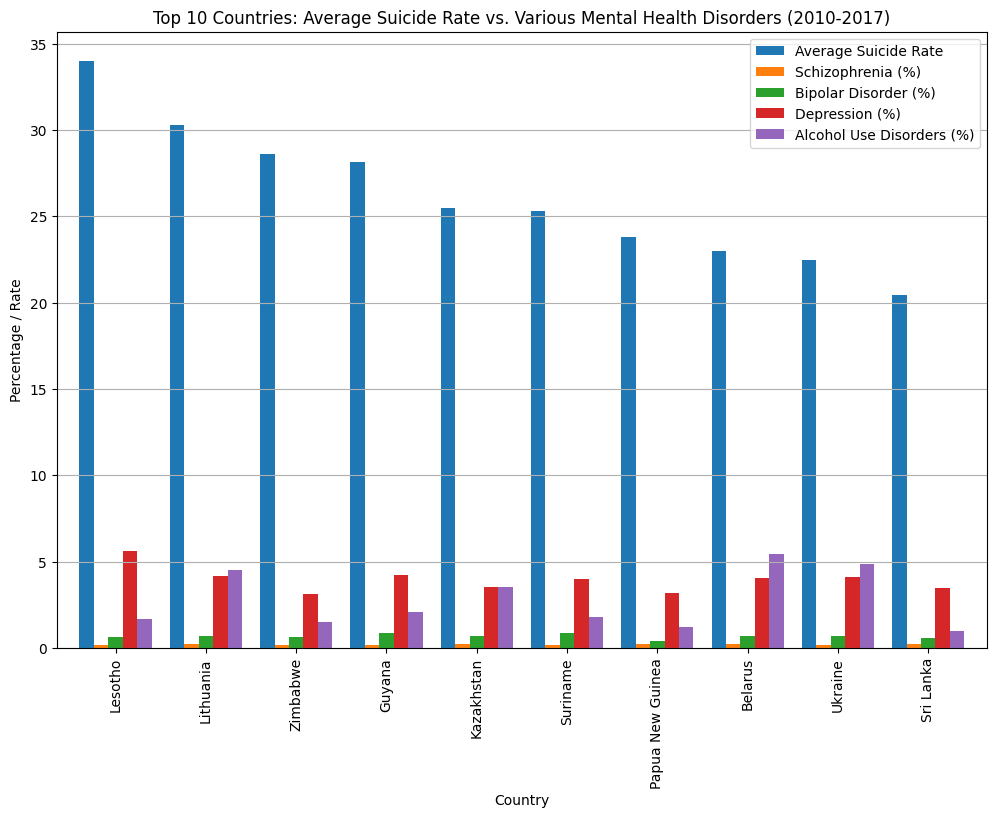

In [228]:
# Calculating the average values for suicide rate and various mental health disorders per country
avg_suicide_rate = filtered_df.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_schizophrenia = filtered_df.groupby('Entity')['Schizophrenia (%)'].mean()
avg_bipolar = filtered_df.groupby('Entity')['Bipolar disorder (%)'].mean()
avg_depression = filtered_df.groupby('Entity')['Depression (%)'].mean()
avg_alcohol_use = filtered_df.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these into a single DataFrame
# Top 10 countries by suicide rate and their average mental health disorders
comparison_avgsuicide = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Schizophrenia (%)': avg_schizophrenia,
    'Bipolar Disorder (%)': avg_bipolar,
    'Depression (%)': avg_depression,
    'Alcohol Use Disorders (%)': avg_alcohol_use
}).sort_values('Average Suicide Rate', ascending=False).head(10)  

# Plotting the data
comparison_avgsuicide.plot(kind='bar', figsize=(12, 8), width=0.8)

# Set the xlabel, ylabel, title and creating bar plot using panadas
# Adding grid lines only to the y-axis
plt.title('Top 10 Countries: Average Suicide Rate vs. Various Mental Health Disorders (2010-2017)')
plt.xlabel('Country')
plt.ylabel('Percentage / Rate')
plt.legend(loc='upper right')
plt.grid(axis='y') 
plt.savefig("Resources/AverageSuicideRatevsMentalHealth.png")
#Display Graph
plt.show()

From the bar graph above we can state that depression and alcohol use disorders appear to be the most common mental health disorders among the countries with the highest suicide rates.
While depression and alcohol use disorders are prevalent, it’s essential to note that this does not necessarily imply a direct relationship with the high suicide rates.

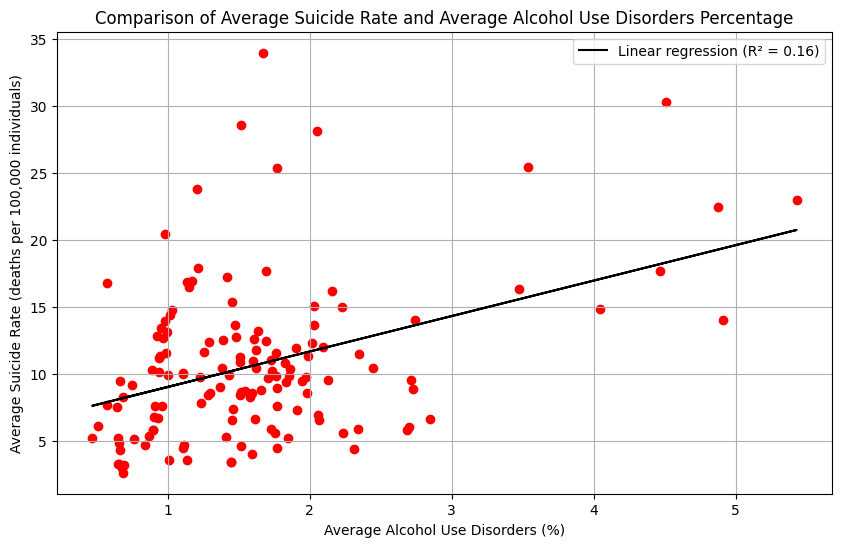

In [229]:
# Calculating the average suicide rate and alcohol use disorders percentage by country
avg_suicide_rate = filtered_df.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_alcohol_disorders = filtered_df.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combining the suicide rate and alcohol use disorder into a single DataFrame
comparison_df = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Average Alcohol Use Disorders (%)': avg_alcohol_disorders
})

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Average Alcohol Use Disorders (%)'], comparison_df['Average Suicide Rate'], color='red')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(comparison_df['Average Alcohol Use Disorders (%)'], comparison_df['Average Suicide Rate'])

# Plot the regression line
plt.plot(comparison_df['Average Alcohol Use Disorders (%)'], intercept + slope * comparison_df['Average Alcohol Use Disorders (%)'], 'black', label=f'Linear regression (R² = {r_value**2:.2f})')

# Adding labels and title
plt.xlabel('Average Alcohol Use Disorders (%)')
plt.ylabel('Average Suicide Rate (deaths per 100,000 individuals)')
plt.title('Comparison of Average Suicide Rate and Average Alcohol Use Disorders Percentage')
plt.legend()
plt.grid(True)
plt.savefig("Resources/AverageSuicideRatevsAlcohol.png")
plt.show()


The scatter plot displays a positive correlation between the average suicide rate and the average alcohol use disorders percentage, as indicated by the upward-sloping linear regression line.
Relatively low R² 0.16 value suggests that this relationship is not strong.

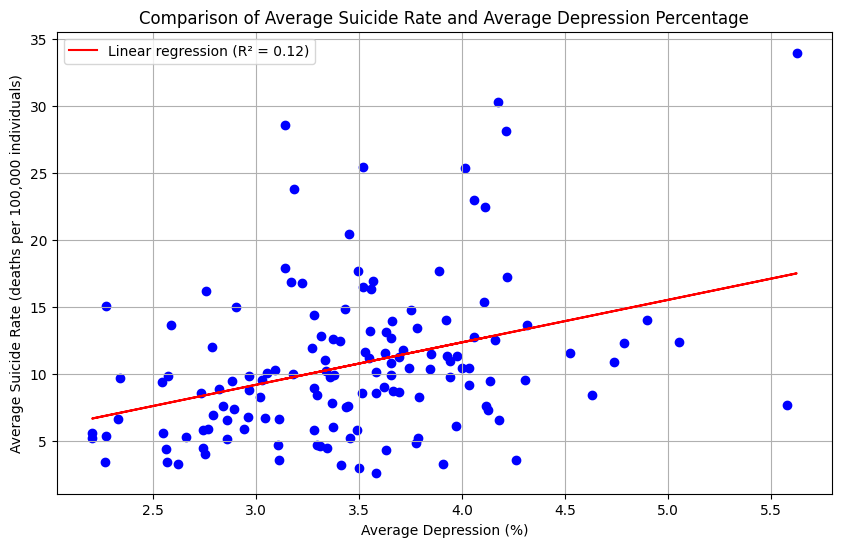

In [230]:
# Calculating the average suicide rat depression percentage by country
avg_suicide_rate = filtered_df.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_depression = filtered_df.groupby('Entity')['Depression (%)'].mean()

# Combining into a single DataFrame
comparison_df = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Average Depression (%)': avg_depression
})

# Cresting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Average Depression (%)'], comparison_df['Average Suicide Rate'], color='blue')

# Adding a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(comparison_df['Average Depression (%)'], comparison_df['Average Suicide Rate'])
plt.plot(comparison_df['Average Depression (%)'], intercept + slope * comparison_df['Average Depression (%)'], 'r', label=f'Linear regression (R² = {r_value**2:.2f})')

#Adding labels and titles
plt.xlabel('Average Depression (%)')
plt.ylabel('Average Suicide Rate (deaths per 100,000 individuals)')
plt.title('Comparison of Average Suicide Rate and Average Depression Percentage')
plt.legend()
plt.grid(True)
plt.savefig("Resources/AverageSuicideRatevsDepression.png")
plt.show()

This scatter plot displays positive correlation between the average suicide rate and the average depression percentage, as indicated by the upward-sloping linear regression line.
A weak positive correlation between average suicide rates and average depression percentages, as evidenced by the low R² value of 0.12.

R-squared: 0.2647568681734206


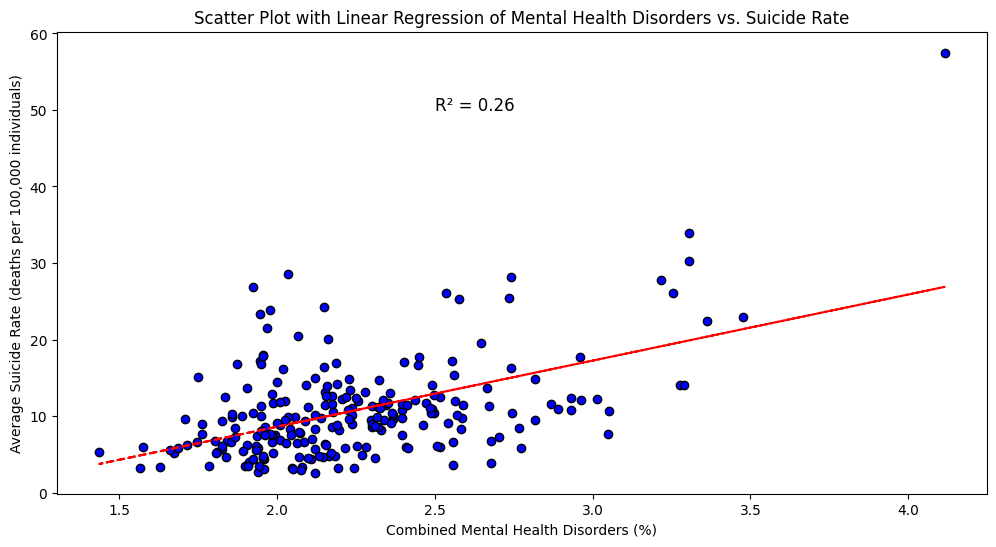

In [231]:
# Ensuring that all relevant columns are numeric
numeric_columns = [
    'Suicide rate (deaths per 100,000 individuals)',
    'Schizophrenia (%)',
    'Bipolar disorder (%)',
    'Depression (%)',
    'Alcohol use disorders (%)']
merged_df_cleaned[numeric_columns] = merged_df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate averages of all mental health disorder
avg_suicide_rate = merged_df_cleaned.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_schizophrenia = merged_df_cleaned.groupby('Entity')['Schizophrenia (%)'].mean()
avg_bipolar = merged_df_cleaned.groupby('Entity')['Bipolar disorder (%)'].mean()
avg_depression = merged_df_cleaned.groupby('Entity')['Depression (%)'].mean()
avg_alcohol_use = merged_df_cleaned.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these averages into a single metric
# Averaging all mental health disorders
combined_mental_health = (
    avg_schizophrenia + avg_bipolar + avg_depression + avg_alcohol_use
) / 4  

# Creating a new DataFrame for the scatter plot
scatter_df = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Combined Mental Health Disorders (%)': combined_mental_health
}).dropna()  

# Creating Scatter plot 
plt.figure(figsize=(12, 6))
plt.scatter(scatter_df['Combined Mental Health Disorders (%)'], scatter_df['Average Suicide Rate'], color='blue', edgecolor='black')

# Performing the linear regression
slope, intercept, r_value, p_value, std_err = linregress(scatter_df['Combined Mental Health Disorders (%)'], scatter_df['Average Suicide Rate'])
regression_line = slope * scatter_df['Combined Mental Health Disorders (%)'] + intercept

# Plotting the regression line
plt.plot(scatter_df['Combined Mental Health Disorders (%)'], regression_line, color='red', linestyle='--', label=f'Linear regression (R² = {r_value**2:.2f})')

# Adding R² value as text on the plot
plt.text(2.5, 50, f'R² = {r_value**2:.2f}', fontsize=12, color='Black')


# Adding labels and title
plt.xlabel('Combined Mental Health Disorders (%)')
plt.ylabel('Average Suicide Rate (deaths per 100,000 individuals)')
plt.title('Scatter Plot with Linear Regression of Mental Health Disorders vs. Suicide Rate')

# Print regression statistics
print(f"R-squared: {r_value**2}")
plt.savefig("Resources/LRSuicideRateMH.png")
# Displaying plot
plt.show()

The moderate R² value indicates that combined mental health disorders are a meaningful factor in predicting suicide rates.
The R² value is 0.26, indicating that approximately 26.5% of the variance in suicide rates can be explained by the variance in combined mental health disorder percentages.

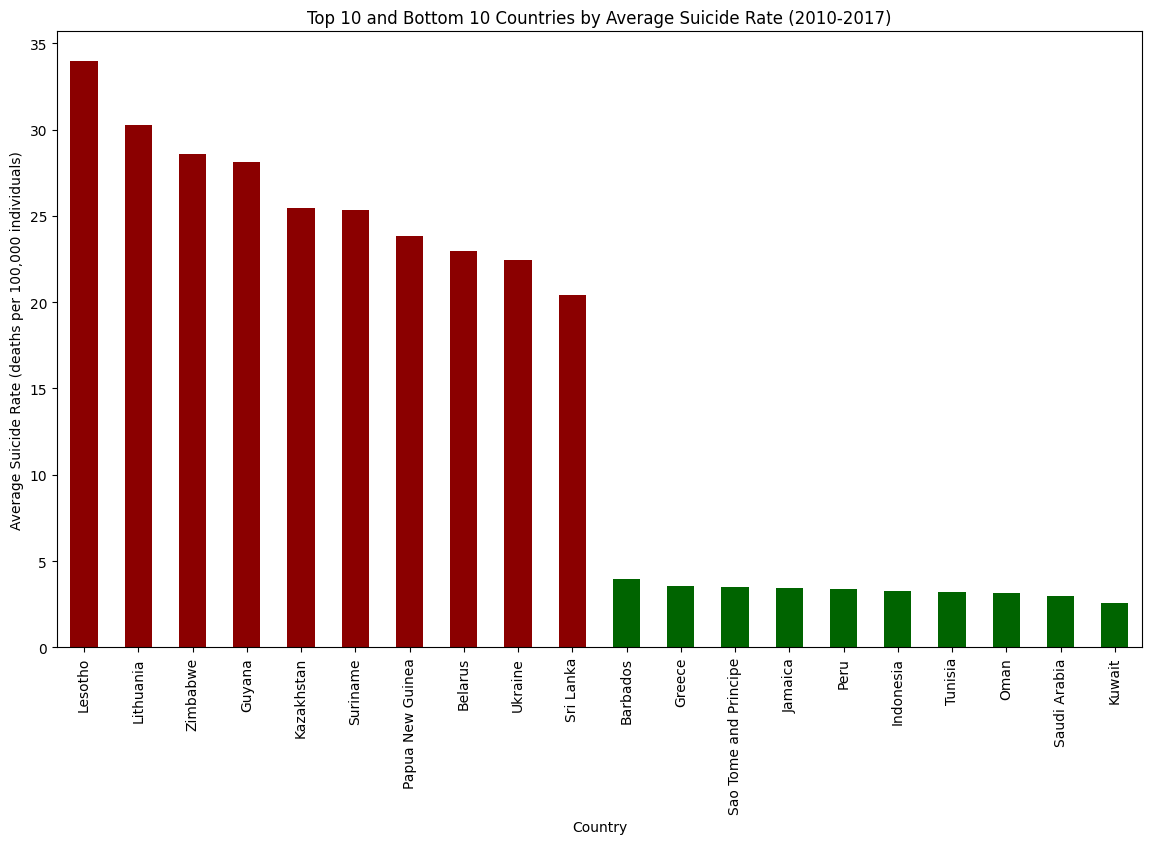

In [232]:
avg_suicide_rate = filtered_df.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean().sort_values(ascending=False)

# Get the top 10 and bottom 10 countries
top_10_countries = avg_suicide_rate.head(10)
bottom_10_countries = avg_suicide_rate.tail(10)

# Combine the top and bottom 10 into a single DataFrame
combined = pd.concat([top_10_countries, bottom_10_countries])

# Plotting top 10 and bottom countries in a graph
plt.figure(figsize=(14, 8))
combined.plot(kind='bar', color=['darkred']*10 + ['darkgreen']*10)
plt.xlabel('Country')
plt.ylabel('Average Suicide Rate (deaths per 100,000 individuals)')
plt.title('Top 10 and Bottom 10 Countries by Average Suicide Rate (2010-2017)')
plt.savefig("Resources/Top10Bottom10.png")
#Display the graph
plt.show()

In [233]:
# Printing the names of the top 10 countries with the highest suicide rates
print("Top 10 Countries with the Highest Average Suicide Rates (2010-2017):")
print(top_10_countries.index.tolist())
print()

# Printing the names of the bottom 10 countries with the lowest suicide rates
print("Bottom 10 Countries with the Lowest Average Suicide Rates (2010-2017):")
print(bottom_10_countries.index.tolist())


Top 10 Countries with the Highest Average Suicide Rates (2010-2017):
['Lesotho', 'Lithuania', 'Zimbabwe', 'Guyana', 'Kazakhstan', 'Suriname', 'Papua New Guinea', 'Belarus', 'Ukraine', 'Sri Lanka']

Bottom 10 Countries with the Lowest Average Suicide Rates (2010-2017):
['Barbados', 'Greece', 'Sao Tome and Principe', 'Jamaica', 'Peru', 'Indonesia', 'Tunisia', 'Oman', 'Saudi Arabia', 'Kuwait']


In [234]:
# Data for the top 10 and bottom 10 countries in terms of average suicide rates categorized by continent
avgsuicide_data = {
    'Country': [
        'Lesotho', 'Lithuania', 'Zimbabwe', 'Guyana', 'Kazakhstan', 
        'Suriname', 'Papua New Guinea', 'Belarus', 'Ukraine', 'Sri Lanka',
        'Barbados', 'Greece', 'Sao Tome and Principe', 'Jamaica', 'Peru',
        'Indonesia', 'Tunisia', 'Oman', 'Saudi Arabia', 'Kuwait'
    ],
    'Continent': [
        'Africa', 'Europe', 'Africa', 'South America', 'Asia', 
        'South America', 'Oceania', 'Europe', 'Europe', 'Asia',
        'Caribbean', 'Europe', 'Africa', 'Caribbean', 'South America',
        'Asia', 'Africa', 'Asia', 'Asia', 'Asia'
    ],
    'Category': ['Top 10'] * 10 + ['Bottom 10'] * 10
}

# Create DataFrame
df = pd.DataFrame(avgsuicide_data)

# Display the table
print("Top 10 and Bottom 10 Countries by Average Suicide Rates (2010-2017) Categorized by Continent:")
display(df)


Top 10 and Bottom 10 Countries by Average Suicide Rates (2010-2017) Categorized by Continent:


,Country,Continent,Category
0,Lesotho,Africa,Top 10
1,Lithuania,Europe,Top 10
2,Zimbabwe,Africa,Top 10
3,Guyana,South America,Top 10
4,Kazakhstan,Asia,Top 10
5,Suriname,South America,Top 10
6,Papua New Guinea,Oceania,Top 10
7,Belarus,Europe,Top 10
8,Ukraine,Europe,Top 10
9,Sri Lanka,Asia,Top 10


Lesotho and Zimbabwe are both in Africa, indicating that certain regions in Africa are facing significant challenges related to mental health and suicide rates.
Lithuania, Belarus, and Ukraine are European countries with high suicide rates.
Guyana and Suriname are in South America and are among the countries with the highest suicide rates.
Sao Tome and Principe and Tunisia are African countries with some of the lowest suicide rates.
Barbados and Jamaica are Caribbean nations with low suicide rates.

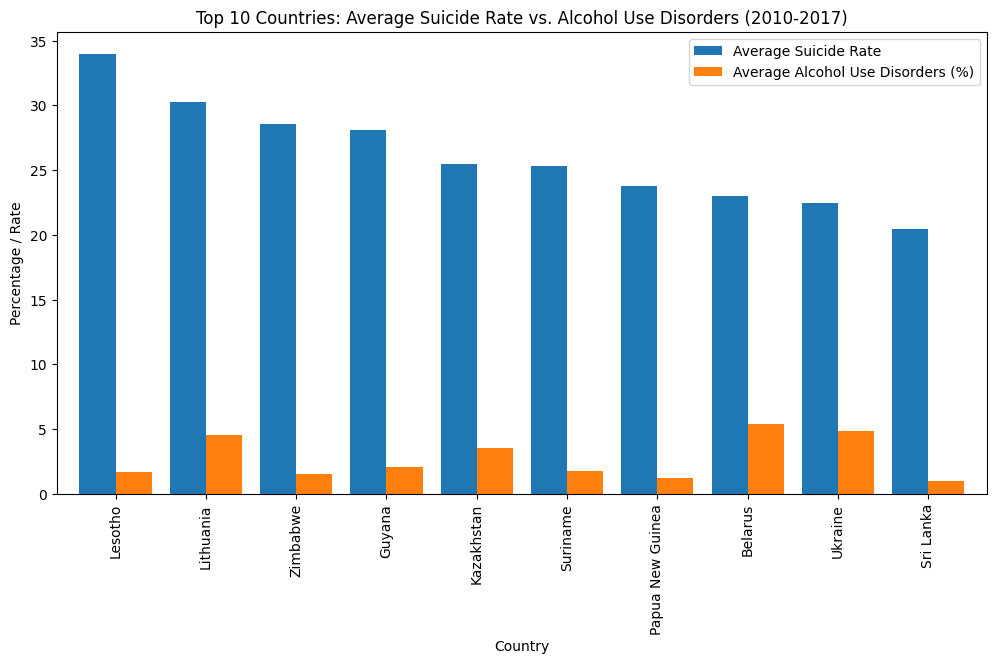

In [235]:
#Creating Bar Graph with Suicide Rate vs. Alcohol Use Disorders (2010-2017)
avg_suicide_rate = filtered_df.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_alcohol_use = filtered_df.groupby('Entity')['Alcohol use disorders (%)'].mean()

# Combine these into a single DataFrame
comparison_df2 = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Average Alcohol Use Disorders (%)': avg_alcohol_use
}).sort_values('Average Suicide Rate', ascending=False).head(10)  # Top 10 countries by suicide rate

# Plotting the data
comparison_df2.plot(kind='bar', figsize=(12, 6), width=0.8)

#Adding Titles
plt.title('Top 10 Countries: Average Suicide Rate vs. Alcohol Use Disorders (2010-2017)')
plt.xlabel('Country')
plt.ylabel('Percentage / Rate')

#Display Graph
plt.show()

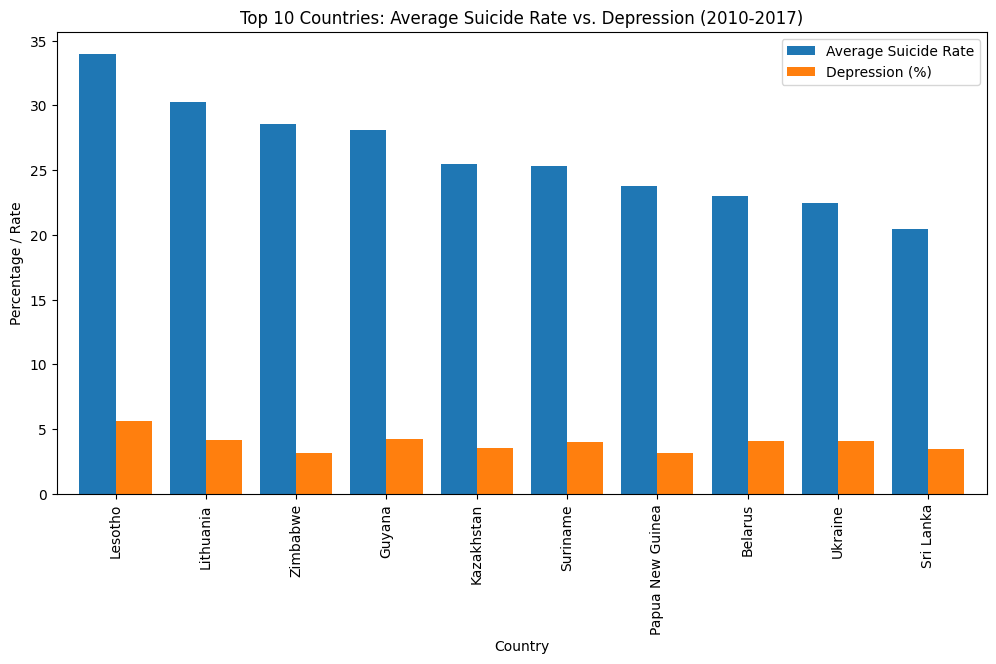

In [236]:
#Creating a Bar graph with Average Suicide Rate vs. Depression (2010-2017
avg_suicide_rate = filtered_df.groupby('Entity')['Suicide rate (deaths per 100,000 individuals)'].mean()
avg_depression = filtered_df.groupby('Entity')['Depression (%)'].mean()

# Combine these into a single DataFrame
comparison_df3 = pd.DataFrame({
    'Average Suicide Rate': avg_suicide_rate,
    'Depression (%)': avg_depression
}).sort_values('Average Suicide Rate', ascending=False).head(10)  # Top 10 countries by suicide rate

# Plotting the data
comparison_df3.plot(kind='bar', figsize=(12, 6), width=0.8)

#Adding titles
plt.title('Top 10 Countries: Average Suicide Rate vs. Depression (2010-2017)')
plt.xlabel('Country')
plt.ylabel('Percentage / Rate')

#Display Graph
plt.show()

C:\Users\manro\AppData\Local\Temp\ipykernel_45372\3579204601.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df_filtered = filtered_df[(merged_df['Year'] >= 2010) & (filtered_df['Year'] <= 2017)]


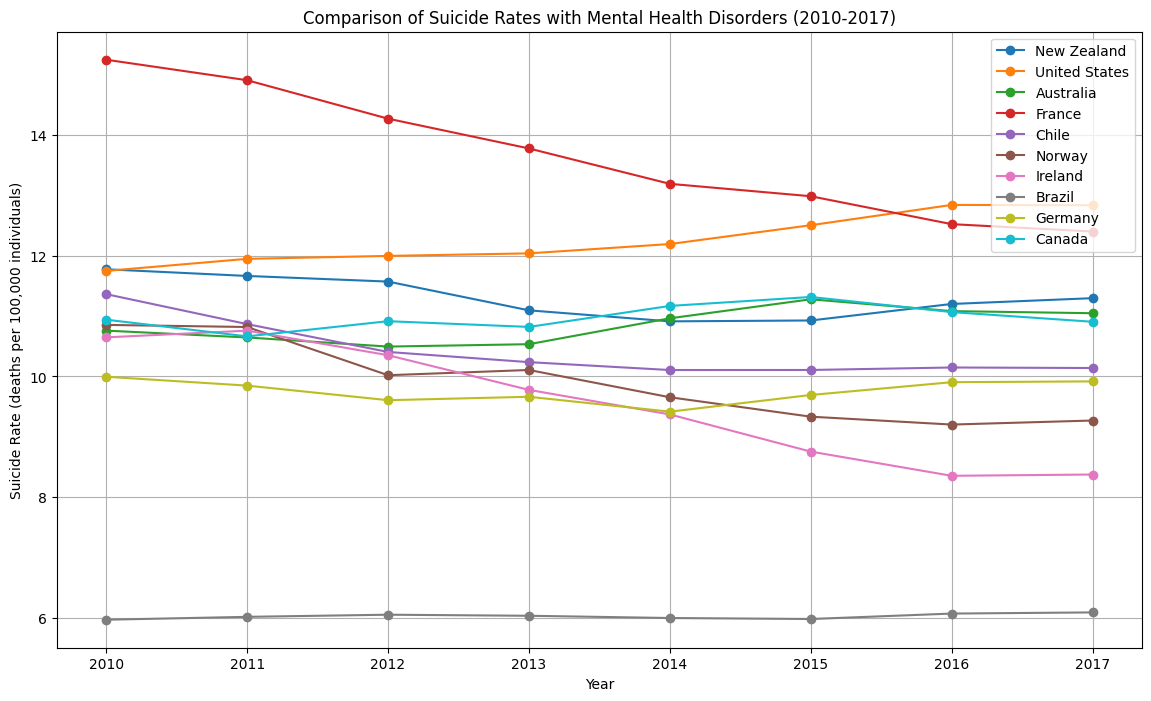

In [237]:
# Convert relevant columns to numeric to avoid issues in plotting graph in the filtered df
columns_to_convert = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 
                      'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 
                      'Alcohol use disorders (%)', 'Suicide rate (deaths per 100,000 individuals)', 'Year']

filtered_df[columns_to_convert] = filtered_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Filter data for the years 2010-2017 
merged_df_filtered = filtered_df[(merged_df['Year'] >= 2010) & (filtered_df['Year'] <= 2017)]

# Calculating the total mental health disorder rate
merged_df_filtered['Total_Mental_Health_Disorder_Rate'] = merged_df_filtered[
    ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 
     'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 
     'Alcohol use disorders (%)']
].sum(axis=1)

# Aggregating the data by country
df_grouped = merged_df_filtered.groupby('Entity').agg({
    'Total_Mental_Health_Disorder_Rate': 'mean',
    'Suicide rate (deaths per 100,000 individuals)': 'mean'
}).reset_index()

# Identify the top 10 countries with the highest mental health disorder rates
top_10_countries = df_grouped.nlargest(10, 'Total_Mental_Health_Disorder_Rate')

# Plotting the linear graph
plt.figure(figsize=(14, 8))
for index, row in top_10_countries.iterrows():
    country_data = merged_df_filtered[merged_df_filtered['Entity'] == row['Entity']]
    plt.plot(country_data['Year'], country_data['Suicide rate (deaths per 100,000 individuals)'],
             marker='o', label=row['Entity'])
#Adding titles and labels
plt.title('Comparison of Suicide Rates with Mental Health Disorders (2010-2017)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (deaths per 100,000 individuals)')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("Resources/LineGraphSuicideRates.png")
#Displaying the graph
plt.show()



Observations from the graph above are as follows-
1-France consistently shows the highest suicide rates among the countries displayed but there is a gradual decrease from around 15 deaths per 100,000 in 2010 to about 13 in 2017.
2-United States displays a slight upward trend in suicide rates, increasing from around 12.5 to approximately 13.5 from 2010-2017.
3- Ireland and Chile had drop in suicide rates from 2010-2017.